In [1]:
import seaborn

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import pickle
import sklearn

from sklearn.cluster import DBSCAN, KMeans

In [2]:
from sklearn.cluster import KMeans

In [112]:
p = pickle.load(open('code/stackrnn/sdata/epoch0', 'rb'))

a = np.array(p)

a = a.reshape(-1, a.shape[2], a.shape[3])

In [113]:
sforsb = a[0]

df = pd.DataFrame(np.transpose(sforsb))

#  [ u, hidden, x, s1, s2, read, v1, v2, yp]
#  {"(": [2], ")": [3], "s": [0], "e": [1], '[': [4], ']': [5]},
# {'e': 1, '(': 2, ')': 4, '[': 8, ']': 16}
# df.index = ['u', 'h_0', 'h_1', 'x:s', 'x:e', 'x:(', 'x:)', 'x:[', 'x:]', 's1', 's2',
#'r_0', 'r_1', 'v1_0', 'v1_1', 'v2_0', 'v2_1', 
#            'yp:e', 'yp:(', 'yp:)', 'yp:[', 'yp:]', 'y:e', 'y:(', 'y:)', 'y:[', 'y:]']


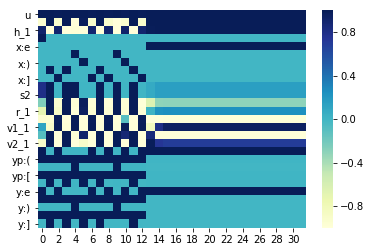

In [114]:
df.index = ['u', '', 'h_1', '', 'x:e', '', 'x:)', '', 'x:]', '', 's2', 
            '', 'r_1', '', 'v1_1', '', 'v2_1', 
           '', 'yp:(', '', 'yp:[', '', 'y:e', '', 'y:)', '', 'y:]']

seaborn.heatmap(df, cmap='YlGnBu')
#seaborn.heatmap(df, cmap='YlGnBu', linewidths=0.01)



In [115]:
# Get Stack space cluster

In [116]:
v = a[:, :, 13:17]


In [117]:
v = v.reshape(-1, 4)

In [118]:
v1 = v[:, :2]
v2 = v[:, 2:]

In [119]:
v = np.array([v1, v2])

In [120]:
v.shape

v = v.reshape(-1, 2)

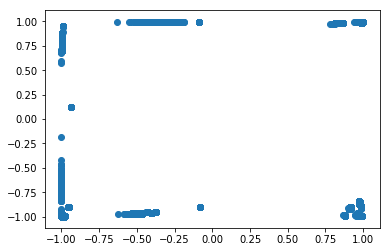

In [121]:









plt.scatter(v[:, 0], v[:, 1])

In [122]:
vkm = KMeans(6).fit(v)

labels = vkm.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

6

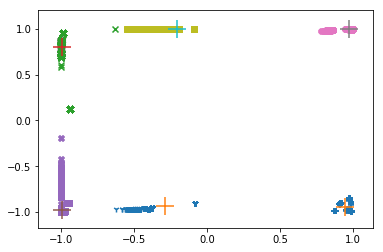

In [123]:
marker = ['+', 'x', 'X', '8', 's', '1', 'D']

mdict = {i: marker[i] for i in range(7)}

number = 6
mdict = {i: marker[i] for i in range(number)}

l = [list() for i in range(number)]
for i in range(v.shape[0]):
    l[labels[i]].append(v[i, :])


for c, i in enumerate(l):
    n = np.array(i)
    plt.scatter(n[:, 0], n[:, 1], marker=mdict[c])
    plt.scatter([vkm.cluster_centers_[c][0]], [vkm.cluster_centers_[c][1]], s=300, marker='+')

In [124]:
vkm.cluster_centers_

array([[ 0.94312318, -0.9491626 ],
       [-0.99119856,  0.79555678],
       [-0.99253061, -0.97525599],
       [ 0.97455508,  0.99516215],
       [-0.20395396,  0.99866306],
       [-0.28638159, -0.93757741]])

In [125]:
h = a[:, :, 1: 3]
h = h.reshape(-1, h.shape[-1])

In [126]:
hkm = KMeans(4).fit(h)

labels = hkm.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_


4

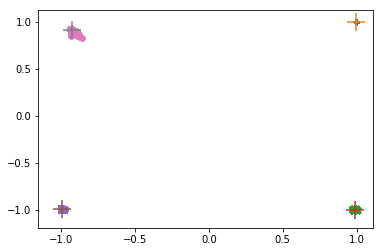

In [127]:





marker = ['+', 'x', 'X', '8', 's', '1', 'D']

mdict = {i: marker[i] for i in range(7)}

number = 4
mdict = {i: marker[i] for i in range(number)}

l = [list() for i in range(number)]
for i in range(h.shape[0]):
    l[labels[i]].append(h[i, :])


for c, i in enumerate(l):
    n = np.array(i)
    plt.scatter(n[:, 0], n[:, 1], marker=mdict[c])
    plt.scatter([hkm.cluster_centers_[c][0]], [hkm.cluster_centers_[c][1]], s=300, marker='+')

In [128]:
hkm.cluster_centers_

array([[ 0.9944158 ,  0.99893359],
       [ 0.98937641, -0.99712733],
       [-0.9910718 , -0.99363989],
       [-0.92319642,  0.90873303]])

In [129]:
xd = {2: "(", 3:")", 0:"s", 1:"e", 4:'[', 5:']'}
yd = {0:'e', 1:'(', 2:')', 3:'[', 4:']'}
hnumber = 4

hd = {str(i): c for i, c in enumerate(['A','B','C','D'])}
hd['-1'] = 'Z'
snumber = 6
sd = {str(i): c for i, c in enumerate(['a','b','c','d','e','f'])}
sd['-1'] = 's'

13

In [144]:
for i in range(a.shape[0]):
    if (''.join(map(lambda x: str(int(x)), list(a[i, :, 4])))).find('1') > 30:
        sample = a[i]
        break

In [148]:
#  [ u, hidden, x, s1, s2, read, v1, v2, yp]
# df.index = ['u', 'h_0', 'h_1', 'x:s', 'x:e', 'x:(', 'x:)', 'x:[', 'x:]', 's1', 's2',
# 11'r_0', 'r_1', 'v1_0', 'v1_1', 'v2_0', 'v2_1', 
#            'yp:e', 'yp:(', 'yp:)', 'yp:[', 'yp:]', 'y:e', 'y:(', 'y:)', 'y:[', 'y:]']


steps = sample.shape[0]
l = list()
d = {'ht1': 'Z', 'rt1': '-1'}

l.append(d)
for i in range(steps):
    d = dict()
    d.update(ht=l[i]['ht1'])
    d.update(rt=sd[l[i]['rt1']])
    d.update(it=xd[np.argwhere(sample[i, 3:9]==1)[0][0]])
    d.update(rt1=str(vkm.predict([sample[i, 11:13]])[0]))
    d.update(ht1=hd[str(hkm.predict([sample[i, 1:3]])[0])])
    d.update(s1t=sample[i, 9])
    d.update(s2t=sample[i, 10])
    d.update(ut=sample[i, 0])
    v1 = sd[str(vkm.predict([sample[i, 13:15]])[0])]
    d.update(v1t=v1)
    v2 = sd[str(vkm.predict([sample[i, 15:17]])[0])]
    d.update(v2t=v2)
    stk = v1+v2 if sample[i, 9] > 0.5 else 'lambda'
    d.update(stack=stk)
    tmp = sample[i, 17: 22]
    s = ''
    for j in range(5):
        if tmp[j]>=0.5:
            s += yd[j]
    d.update(yp=s)
    tmp = sample[i, 22: 27]
    s = ''
    for j in range(5):
        if tmp[j]>=0.5:
            s += yd[j]
    d.update(y=s)
    l.append(d)

In [150]:
for i in range(1, steps+1):
    d = l[i]
    print('ht: %s it: %s rt: %s ht1: %s Stack: %s s1: %.2f s2: %.2f u:%.2f v1t: %s v2t: %s y: %s yp: %s' %
         (d['ht'], d['it'], d['rt'], d['ht1'], d['stack'], d['s1t'], d['s2t'], d['ut'], d['v1t'], d['v2t'], d['y'], d['yp']))

ht: Z it: s rt: s ht1: D Stack: bf s1: 0.80 s2: 0.80 u:1.00 v1t: b v2t: f y: e([ yp: e([
ht: D it: ( rt: f ht1: C Stack: cd s1: 1.00 s2: 1.00 u:1.00 v1t: c v2t: d y: ()[ yp: ()[
ht: C it: ( rt: d ht1: C Stack: da s1: 0.98 s2: 0.98 u:1.00 v1t: d v2t: a y: ()[ yp: ()[
ht: C it: [ rt: a ht1: B Stack: aa s1: 0.99 s2: 0.99 u:1.00 v1t: a v2t: a y: ([] yp: ([]
ht: B it: ] rt: a ht1: C Stack: lambda s1: 0.01 s2: 0.01 u:1.00 v1t: a v2t: c y: ()[ yp: ()[
ht: C it: [ rt: a ht1: B Stack: aa s1: 0.99 s2: 0.99 u:1.00 v1t: a v2t: a y: ([] yp: ([]
ht: B it: ( rt: a ht1: C Stack: ac s1: 1.00 s2: 1.00 u:1.00 v1t: a v2t: c y: ()[ yp: ()[
ht: C it: ) rt: c ht1: B Stack: lambda s1: 0.01 s2: 0.01 u:1.00 v1t: c v2t: a y: ([] yp: ([]
ht: B it: ( rt: a ht1: C Stack: ac s1: 1.00 s2: 1.00 u:1.00 v1t: a v2t: c y: ()[ yp: ()[
ht: C it: ) rt: c ht1: B Stack: lambda s1: 0.01 s2: 0.01 u:1.00 v1t: c v2t: a y: ([] yp: ([]
ht: B it: ( rt: a ht1: C Stack: ac s1: 1.00 s2: 1.00 u:1.00 v1t: a v2t: c y: ()[ yp: ()[
ht: C it: